In [1]:
import pandas as pd
uri ='https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
a_renomear = {
    'expected_hours' : 'horas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}

dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
trocar ={
    0 : 1,
    1 : 0
}

dados['finalizados'] = dados.nao_finalizado.map(trocar)
dados.head()

,nao_finalizado,horas,preco,finalizados
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [4]:
dados.tail()

,nao_finalizado,horas,preco,finalizados
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<Axes: xlabel='horas', ylabel='preco'>

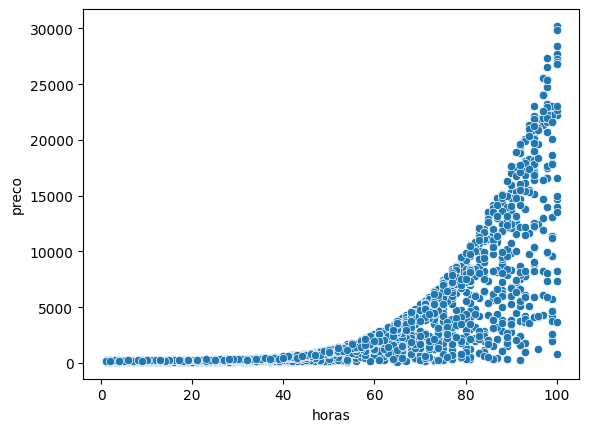

In [5]:
import seaborn as sns

sns.scatterplot(x='horas', y='preco', data=dados)

<Axes: xlabel='horas', ylabel='preco'>

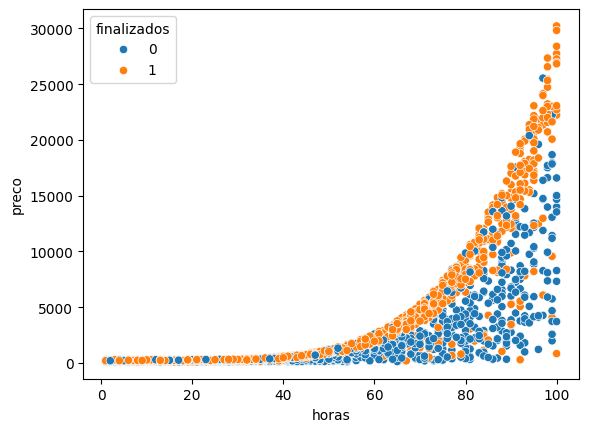

In [6]:
sns.scatterplot(x='horas', y='preco', hue='finalizados', data=dados)

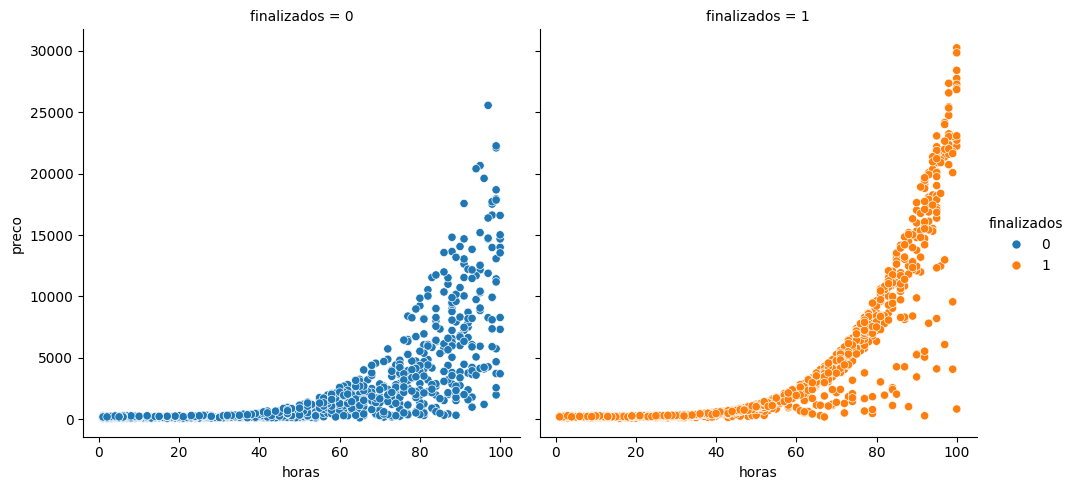

In [7]:
sns.relplot(x='horas', y='preco', hue='finalizados', col='finalizados', data=dados)

In [8]:
x = dados[['horas', 'preco']]
y = dados['finalizados']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                          random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 52.59%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [10]:
import numpy as np

linha_base = np.ones(540)
acuracia = accuracy_score(teste_y, linha_base) * 100
print("A acurácia da base line foi %.2f%%" % acuracia)

A acurácia da base line foi 52.59%
